# BANK MARKETING - DATA ANALYSIS PROJECT

## Project Description

    - This project is to analyze a data of a marketing campaign provided by banking institutions (can be considered as our customer). 
    - The requirement of the bank institutions is to promote their clients to subscribe their services (in this case: term deposit).

## Goals of this project:

    1. Build a machine learning model that are able to predict if a client will subscribe to the banks' service 
    
    2. Apply various useful and advanced machine learning concepts to a real data analysis project. The main concepts were listed following:
           - Testing - Unit test in python (テスト入門)
           - Scikit-learn Intermediate: customized transformer, pipeline to automatically pre-process data (scikit-learn中級編)
           - Pre-processing data (データ分析の前処理)
           - Interpretation of forecast results using SHAP values (SHAP値を用いた予測結果の解釈)

### Data source:
    

- UCI Machine Learning Repository - [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)


### Construction of this project

- `test_data.py` (customized_packages/unit_test/test_data.py) : apply unit test to confirm the downloaded data
- `01_exploratory_data_analysis.ipynb` : Overview of data and visualization
- `02_preprocess_data.ipynb` : Preprocess data using Scikit-learn intermidate concepts (customized transformer, Pipeline)
- `03_build_model.ipynb`: Build models using [Random Forrest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)
- `04_model_evaluation.ipynb`: Interpretation of model' results using [SHAP library](https://github.com/slundberg/shap)


## Importing

In [1]:
# !pip install wget

In [2]:
# For data analysis
import pandas as pd
import numpy as np
import datetime

# For visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler

# Importing customized functions 
from customized_packages.data import get_bank_data
from customized_packages.customized_functions import plot_bar, plot_heatmap, plot_hists
from customized_packages.customized_functions import get_full_columns

# For save downloaded data
import pickle

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set pd option
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)

# Set properties for plots
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams['axes.prop_cycle']  = cycler(color=['#a8c97f', '#F28E2B', '#E15759', '#76B7B2','#59A14E',
                                                 '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['axes.titlesize'] = 15

In [4]:
# Load data
raw_bank_df = get_bank_data()

100% [............................................................................] 579043 / 579043
Finished downloading data!


In [5]:
bank_df = raw_bank_df.copy()

## Check data

In [6]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank_df.shape

(4521, 17)

In [8]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Attribute Information:

**bank client data:**
- 1. age (numeric)
- 2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5. default: has credit in default? (categorical: 'no','yes','unknown')
- 6. housing: has housing loan? (categorical: 'no','yes','unknown')
- 7. loan: has personal loan? (categorical: 'no','yes','unknown') #### related with the last contact of the current campaign:
- 8. contact: contact communication type (categorical: 'cellular','telephone')
- 9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. #### other attributes:
- 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14. previous: number of contacts performed before this campaign and for this client (numeric)
- 15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') #### social and economic context attributes
- 16. balance : balance

**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [9]:
columns_with_correct_order = get_full_columns()
bank_df = bank_df[columns_with_correct_order]

In [10]:
bank_df.isin(['unknown']).sum(axis = 0)

age             0
job            38
marital         0
education     187
default         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
balance         0
y               0
dtype: int64

> Null values were found as the form of "unknown"

In [11]:
bank_df.describe(include= "all", percentiles = [.1,.25,.5,.75,.9] )

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balance,y
count,4521.000000,4521,4521,4521,4521,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521.000000,4521
unique,NaN,12,3,4,2,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN,2
top,NaN,management,married,secondary,no,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN,no
freq,NaN,969,2797,2306,4445,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,NaN,4000
mean,41.170095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,1422.657819,NaN
std,10.576211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,3009.638142,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,-3313.000000,NaN
10%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,58.000000,1.000000,-1.000000,0.000000,NaN,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,69.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,444.000000,NaN


### Check target variables

In [12]:
bank_df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [13]:
bank_df["y"].unique()

array(['no', 'yes'], dtype=object)

## Data visualization

### Target variable

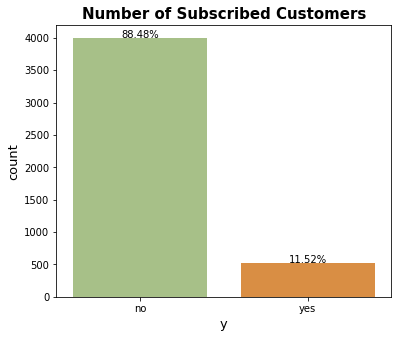

In [14]:
plot_bar(bank_df, x_axis= "y", title= 'Number of Subscribed Customers');

### Feature: marital

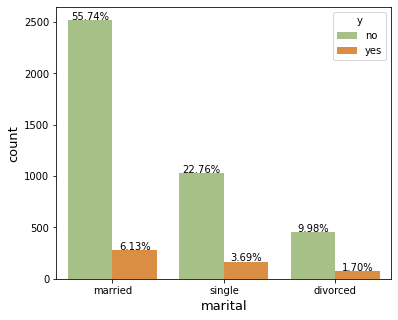

In [15]:
plot_bar(bank_df, "marital", hue = "y");

### Feature: education

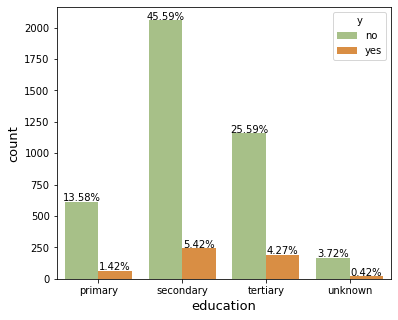

In [16]:
plot_bar(bank_df, x_axis= "education", hue = "y");

### Feature: job

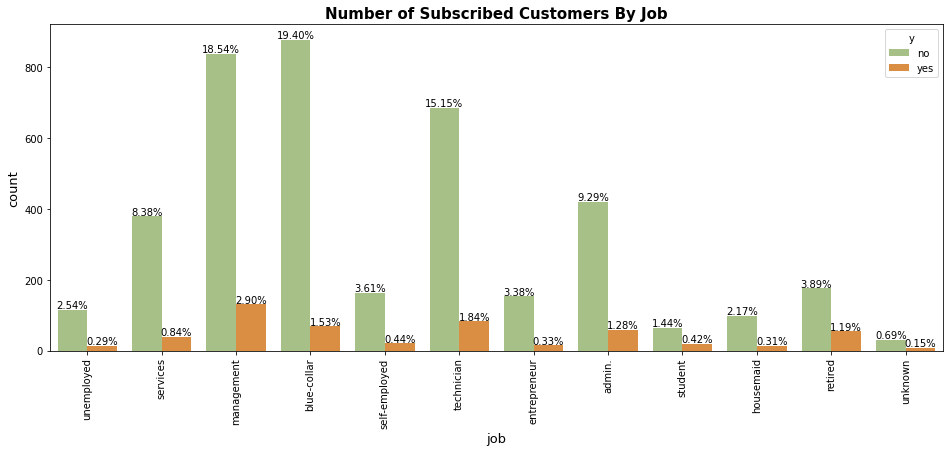

In [17]:
plot_bar(bank_df, "job", hue = "y", label_rotation=True,
         figure_size= (16,6),
         title = 'Number of Subscribed Customers By Job');

### Feature: poutcome

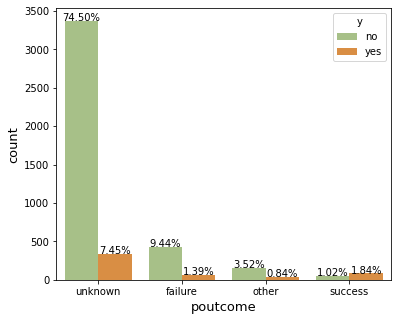

In [18]:
plot_bar(bank_df, x_axis= "poutcome", hue = "y")

### Histogram of numerical features

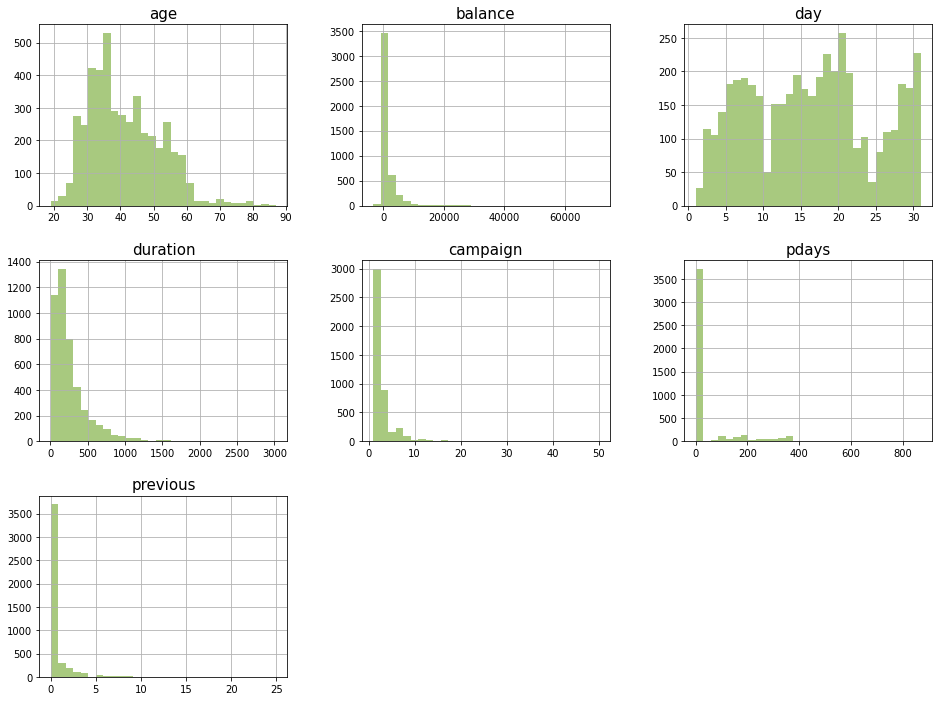

In [19]:
plot_hists(bank_df);

### Correaltion of numerical features

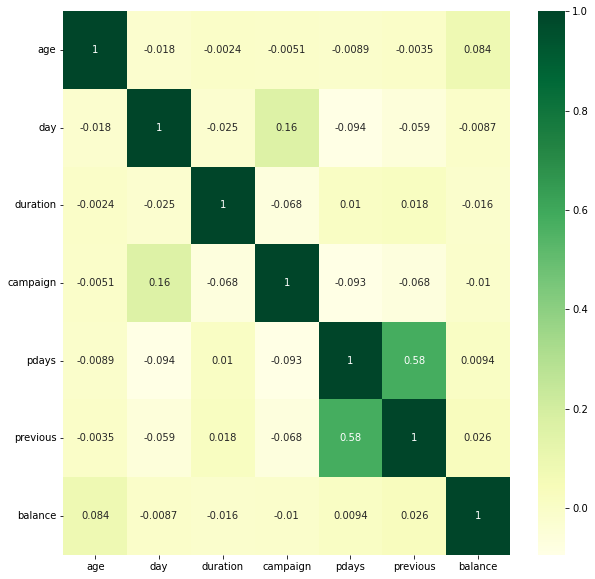

In [20]:
plot_heatmap(bank_df, ylabel_rotation=True);

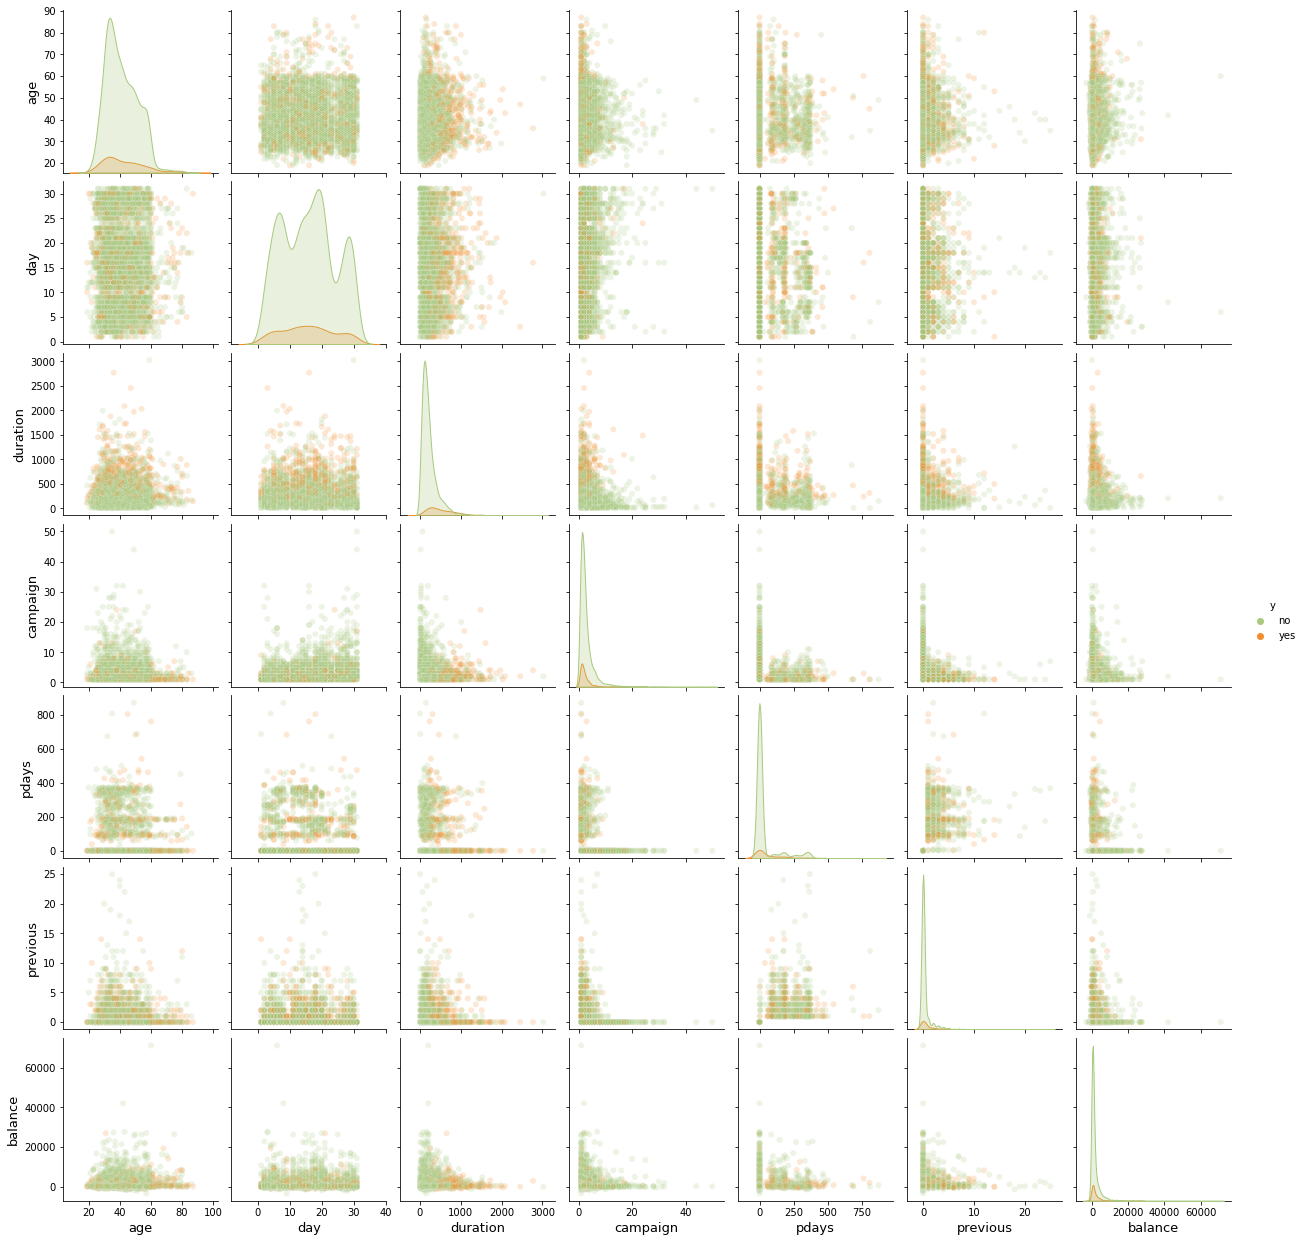

In [21]:
sns.pairplot(bank_df, hue = "y", kind='scatter', plot_kws={'alpha':0.2});